### Load modules

In [1]:
import rasterio
import rasterio.features
import rasterio.warp
import matplotlib
import numpy as np
from rasterio.plot import show
from matplotlib import pyplot as plt
%matplotlib inline

### Check version

In [2]:
# Check version
print("rasterio's version: " + rasterio.__version__)

rasterio's version: 1.1.2


### Load image

In [3]:
# Load Image
img_fp = 'example.gtif'

# Open a geospatial dataset
dataset = rasterio.open(img_fp)

### Image properties

In [4]:
# Number of bands
num_bands = dataset.count
print('Number of bands: {n}\n'.format(n=num_bands))

# Image size
rows, cols = dataset.shape
print('Image size: {r} rows x {c} columns\n'.format(r=rows, c=cols))

# Raster escription and metadata
desc = dataset.descriptions
metadata = dataset.meta

print('Description: {desc}\n'.format(desc=desc))
print('All raster metadata:')
print(metadata)
print('\n')

# What driver was used to open the raster?
driver = dataset.driver
print('Raster driver: {d}\n'.format(d=driver))

# What is the raster's projection?
proj = dataset.crs
print('Image projection:')
print(proj, '\n')

# What is the raster's "geo-transform"
gt = dataset.transform

print('Image geotransform:\n{gt}\n'.format(gt=gt))

Number of bands: 8

Image size: 250 rows x 250 columns

Description: ('band 1 reflectance', 'band 2 reflectance', 'band 3 reflectance', 'band 4 reflectance', 'band 5 reflectance', 'band 7 reflectance', 'band 6 temperature', None)

All raster metadata:
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9999.0, 'width': 250, 'height': 250, 'count': 8, 'crs': CRS.from_epsg(32615), 'transform': Affine(30.0, 0.0, 462405.0,
       0.0, -30.0, 1741815.0)}


Raster driver: GTiff

Image projection:
EPSG:32615 

Image geotransform:
| 30.00, 0.00, 462405.00|
| 0.00,-30.00, 1741815.00|
| 0.00, 0.00, 1.00|



### Statistics for each band

In [5]:
allband = dataset.read()

# Calculate statistics for each band
stats = []
for band in allband:
    stats.append({
        'min': band.min(),
        'mean': band.mean(),
        'median': np.median(band),
        'max': band.max()})

print(stats)

[{'min': 198, 'mean': 439.015984, 'median': 414.0, 'max': 1810}, {'min': 315, 'mean': 661.54288, 'median': 632.0, 'max': 2294}, {'min': 160, 'mean': 589.379808, 'median': 533.0, 'max': 2820}, {'min': 1105, 'mean': 3442.297712, 'median': 3441.0, 'max': 5138}, {'min': 353, 'mean': 2181.928672, 'median': 2170.0, 'max': 4548}, {'min': 145, 'mean': 1049.99384, 'median': 992.0, 'max': 3705}, {'min': 2335, 'mean': 2678.677184, 'median': 2637.0, 'max': 3546}, {'min': 0, 'mean': 0.0, 'median': 0.0, 'max': 0}]


### Open 7th band in image

Image size: 250 rows x 250 columns



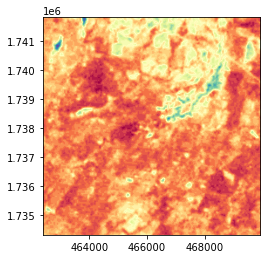

In [6]:
# Open the seventh band in our image - NIR here
band7 = dataset.read(7)
print('Image size: {r} rows x {c} columns\n'.format(r=band7.shape[0], c=band7.shape[1]))
show(band7, transform=dataset.transform,cmap='Spectral')

### Image scaling

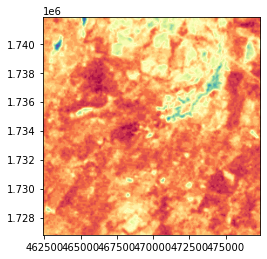

In [7]:
from rasterio.enums import Resampling
factor = 0.5
# resample data to target shape
data = dataset.read(
    out_shape=(
    dataset.count,
    int(dataset.height*factor),
    int(dataset.width*factor)
    ),
    resampling=Resampling.bilinear
    )

# scale image transform
transform = dataset.transform * dataset.transform.scale(
    (dataset.width / data.shape[-1]),
    (dataset.height / data.shape[-2])
    )

show(band7, transform=transform,cmap='Spectral')

### Load TensorFlow

In [8]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


### Rotate 90 degree counter clockwise (TensorFlow)

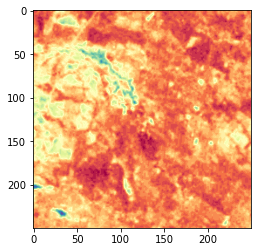

In [9]:
Rotated = np.expand_dims(band7,axis=2)
Rotated = tf.image.rot90(Rotated)
plt.imshow(Rotated[:,:,0],cmap = 'Spectral')

### Transpose image (TensorFlow)

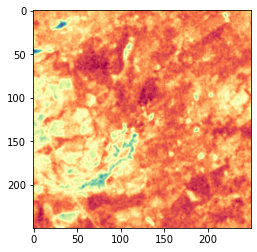

In [10]:
Tranposed = np.expand_dims(band7,axis=2)
Tranposed = tf.image.transpose(Tranposed)
plt.imshow(Tranposed[:,:,0],cmap = 'Spectral')

### Resize (downsampling 0.25) using TensorFlow with bilinear interpolation

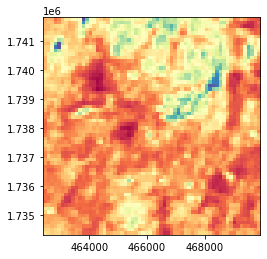

In [11]:
Resize = np.expand_dims(band7,axis=2)
Resize = tf.image.resize(Resize,[int(rows*0.25), int(cols*0.25)], method='bilinear', antialias=True)
plt.imshow(Resize[:,:,0],cmap = 'Spectral')

# scale image transform
transform = dataset.transform * dataset.transform.scale(
    (dataset.width / int(cols*0.25)),
    (dataset.height / int(rows*0.25))
    )
show(Resize[:,:,0], transform=transform,cmap='Spectral')

### Resize (upsampling 2.25) using TensorFlow with nearest neighbour method

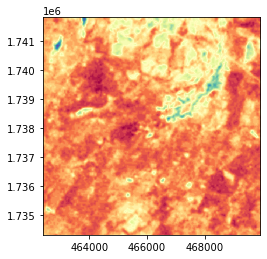

In [12]:
Resize = np.expand_dims(band7,axis=2)
Resize = tf.image.resize(Resize,[int(rows*2.25), int(cols*2.25)], method='nearest', antialias=True)

# scale image transform
transform = dataset.transform * dataset.transform.scale(
    (dataset.width / int(cols*2.25)),
    (dataset.height / int(rows*2.25))
    )
show(Resize[:,:,0], transform=transform,cmap='Spectral')